## Troubleshooting first Warmed simulation

The first Improved, grass only, warmed treatment simulation failed to produce any vegetation. The simulation finished successfully, but it looks like all the vegetation dies in the first year and then fails to grow back. 

See all CLM output fileds: https://www2.cesm.ucar.edu/models/cesm1.2/clm/models/lnd/clm/doc/UsersGuide/history_fields_table_40.xhtml

In [3]:
import xarray as xr  # NetCDF data handling
import matplotlib.pyplot as plt  # Plotting
import time  # Keeping track of runtime
import json  # For reading data dictionaries stored in json format
import datetime as dt  # for workaround with long simulations (beyond year 2262)
from pathlib import Path
import pandas as pd

In [1]:
file_path_IW = f"../../results/alp4-1500-warmed-IW/alp4-1500-warmed-IW.0-1500.nc"
file_path_IW

'../../results/alp4-1500-warmed-IW/alp4-1500-warmed-IW.0-1500.nc'

In [4]:
IW_data = xr.open_mfdataset(file_path_IW,
                            combine='by_coords',
                            decode_times=True
                            )

In [5]:
IW_data

<xarray.Dataset>
Dimensions:                           (levgrnd: 25, levsoi: 20, levlak: 10,
                                       levdcmp: 25, fates_levscls: 13,
                                       fates_levscag: 91, fates_levscpf: 39,
                                       fates_levcacls: 2, fates_levcapf: 6,
                                       fates_levage: 7, fates_levheight: 6,
                                       fates_levpft: 3, fates_levfuel: 6,
                                       ...
                                       fates_levagepft: 21,
                                       fates_levagefuel: 42, fates_levcdsc: 26,
                                       fates_levcdpf: 78, fates_levcdam: 2,
                                       time: 18000, hist_interval: 2,
                                       lndgrid: 1, fates_levelem: 1,
                                       fates_levelcwd: 4, glc_nec: 10, ltype: 9)
Coordinates: (12/15)
  * levgrnd                           (levgrnd) float32 0.01 0.04 ... 28.87 42.0
  * levsoi                            (levsoi) float32 0.01 0.04 ... 6.94 8.03
  * levlak                            (levlak) float32 0.05 0.6 ... 34.33 44.78
  * levdcmp                           (levdcmp) float32 0.01 0.04 ... 28.87 42.0
  * fates_levscls                     (fates_levscls) float32 0.0 5.0 ... 100.0
  * fates_levcacls                    (fates_levcacls) float32 0.0 5.0
    ...                                ...
  * fates_levfuel                     (fates_levfuel) int32 1 2 3 4 5 6
  * fates_levcwdsc                    (fates_levcwdsc) int32 1 2 3 4
  * fates_levcan                      (fates_levcan) int32 1 2
  * fates_levleaf                     (fates_levleaf) int32 1 2 3 4 ... 28 29 30
  * fates_levcdam                     (fates_levcdam) float32 0.0 80.0
  * time                              (time) object 0001-02-01 00:00:00 ... 1...
Dimensions without coordinates: fates_levscag, fates_levscpf, fates_levcapf,
                                fates_levcnlf, fates_levcnlfpf,
                                fates_levscagpf, fates_levagepft,
                                fates_levagefuel, fates_levcdsc, fates_levcdpf,
                                hist_interval, lndgrid, fates_levelem,
                                fates_levelcwd, glc_nec, ltype
Data variables: (12/505)
    fates_scmap_levscag               (fates_levscag) int32 dask.array<chunksize=(91,), meta=np.ndarray>
    fates_agmap_levscag               (fates_levscag) int32 dask.array<chunksize=(91,), meta=np.ndarray>
    fates_pftmap_levscpf              (fates_levscpf) int32 dask.array<chunksize=(39,), meta=np.ndarray>
    fates_scmap_levscpf               (fates_levscpf) int32 dask.array<chunksize=(39,), meta=np.ndarray>
    fates_pftmap_levcapf              (fates_levcapf) int32 dask.array<chunksize=(6,), meta=np.ndarray>
    fates_camap_levcapf               (fates_levcapf) int32 dask.array<chunksize=(6,), meta=np.ndarray>
    ...                                ...
    WTGQ                              (time, lndgrid) float32 dask.array<chunksize=(18000, 1), meta=np.ndarray>
    W_SCALAR                          (time, levsoi, lndgrid) float32 dask.array<chunksize=(18000, 20, 1), meta=np.ndarray>
    ZBOT                              (time, lndgrid) float32 dask.array<chunksize=(18000, 1), meta=np.ndarray>
    ZWT                               (time, lndgrid) float32 dask.array<chunksize=(18000, 1), meta=np.ndarray>
    ZWT_CH4_UNSAT                     (time, lndgrid) float32 dask.array<chunksize=(18000, 1), meta=np.ndarray>
    ZWT_PERCH                         (time, lndgrid) float32 dask.array<chunksize=(18000, 1), meta=np.ndarray>
Attributes: (12/36)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              Thu Jun 29 15:31:

# whole simulation time

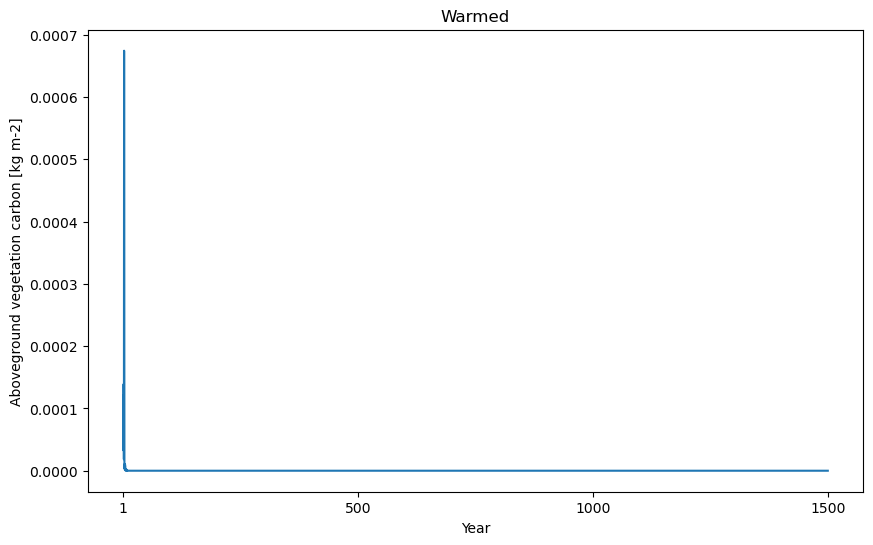

In [23]:
# Plot aboveground biomass
# Create year labels for x axis (otherwise shows month 0-18000)
tick_locations = [0, # first year
                  6000, # year 500 = 500*12months
                  12000, # year 1000
                  18000 # year 1500
                  ]
labels = ['1','500','1000','1500']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(len(IW_data["time"])), # x axis
        IW_data["FATES_VEGC_ABOVEGROUND"]) # y axis
ax.set_title(f"Warmed") # simulation name
ax.set_xlabel("Year")
ax.set_ylabel(f"Aboveground vegetation carbon [{IW_data['FATES_VEGC_ABOVEGROUND'].units}]")

# Set x-axis tick labels every 500 years
ax.set_xticks(tick_locations)
ax.set_xticklabels(labels)

plt.show()

# Subset first four years

Hui suggested looking at mortality outputs and GPP in the first year to try to figure out what happens. 

First make a new concatenated data file for the first two years. Manually copy the history files over to a new folder. 

In [28]:
%%bash
cd ~
pwd
ncrcat /mnt/c/Users/evaler/temp/alp4-1500-warmed-IW/first_four/*.nc /mnt/c/Users/evaler/temp/alp4-1500-warmed-IW/alp4-1500-warmed-IW.1-4.nc
ls /mnt/c/Users/evaler/temp/alp4-1500-warmed-IW/

/home/evaler
alp4-1500-warmed-IW.0-1500.nc
alp4-1500-warmed-IW.1-2.nc
alp4-1500-warmed-IW.1-4.nc
first_four
history_files


Move the new file into the main results directory, /results/alp4-1500-warmed-IW/. Then read in the subset:

In [29]:
file_path_IW_subset = f"../../results/alp4-1500-warmed-IW/alp4-1500-warmed-IW.1-4.nc"
file_path_IW_subset


'../../results/alp4-1500-warmed-IW/alp4-1500-warmed-IW.1-4.nc'

In [31]:
# read in subset
IW_subset = xr.open_mfdataset(file_path_IW_subset,
                              combine='by_coords',
                              decode_times=True
                              )

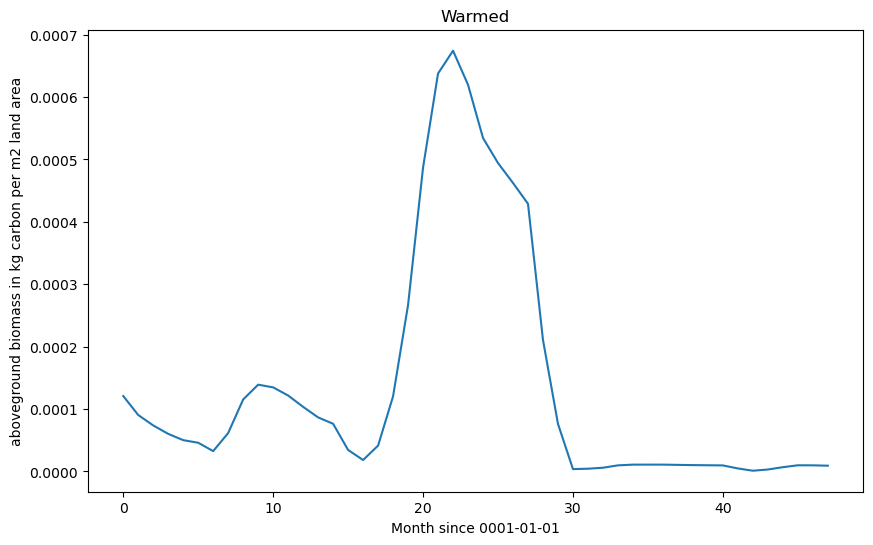

In [36]:
# Plot aboveground biomass
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(len(IW_subset["time"])), # x axis
        IW_subset["FATES_VEGC_ABOVEGROUND"]) # y axis
ax.set_title(f"Warmed") # simulation name
ax.set_xlabel("Month since 0001-01-01")
ax.set_ylabel(f"{IW_subset['FATES_VEGC_ABOVEGROUND'].long_name}")

plt.show()

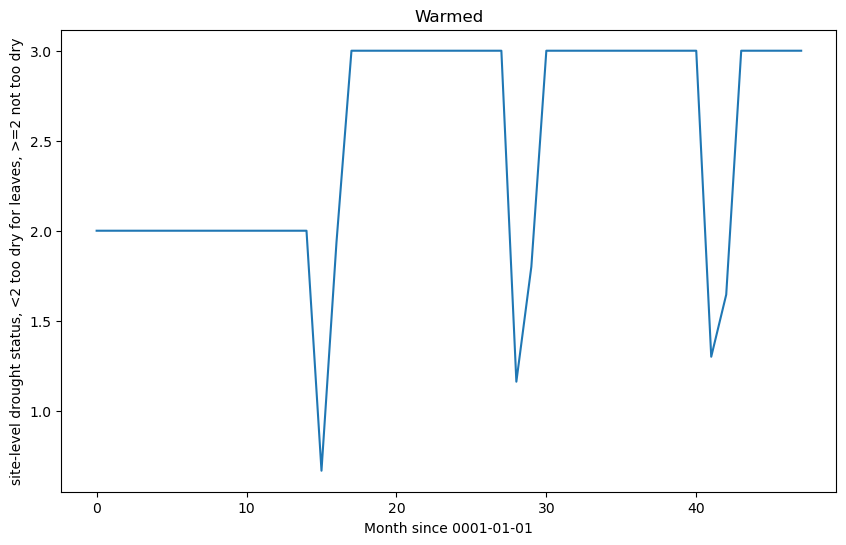

In [37]:
# Plot leaf drought status
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(len(IW_subset["time"])), # x axis
        IW_subset["FATES_DROUGHT_STATUS"]) # y axis
ax.set_title(f"Warmed") # simulation name
ax.set_xlabel("Month since 0001-01-01")
ax.set_ylabel(f"{IW_subset['FATES_DROUGHT_STATUS'].long_name}")
plt.show()

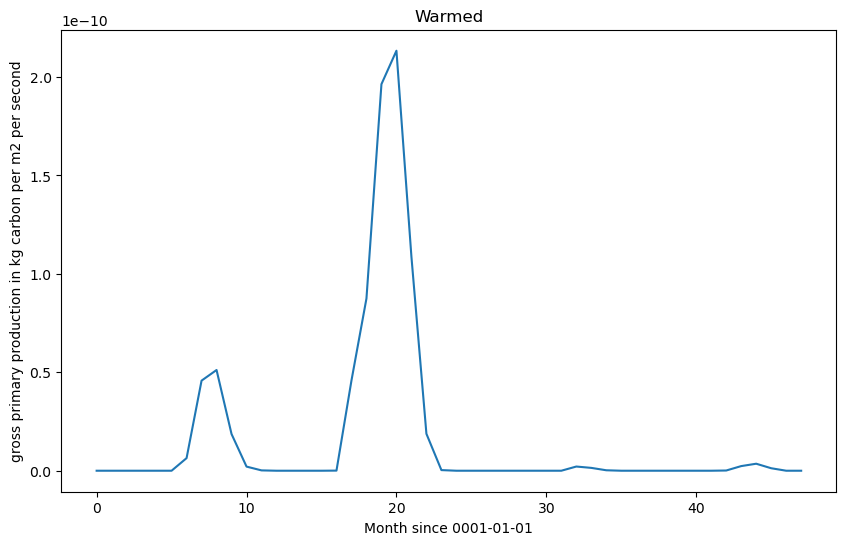

In [39]:
# Plot GPP
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(len(IW_subset["time"])), # x axis
        IW_subset["FATES_GPP"]) # y axis
ax.set_title(f"Warmed") # simulation name
ax.set_xlabel("Month since 0001-01-01")
ax.set_ylabel(f"{IW_subset['FATES_GPP'].long_name}")
plt.show()

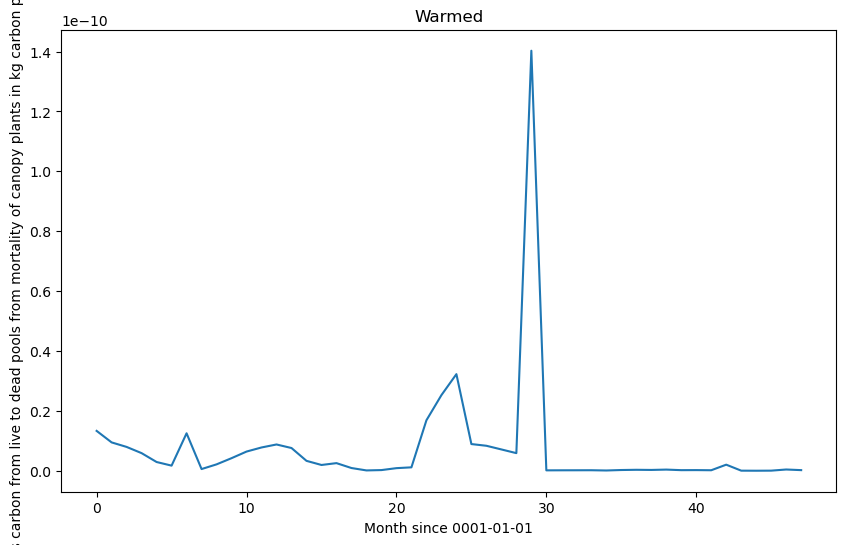

In [42]:
# Plot mortality
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(len(IW_subset["time"])), # x axis
        IW_subset["FATES_MORTALITY_CFLUX_CANOPY"]) # y axis
ax.set_title(f"Warmed") # simulation name
ax.set_xlabel("Month since 0001-01-01")
ax.set_ylabel(f"{IW_subset['FATES_MORTALITY_CFLUX_CANOPY'].long_name}")
plt.show()

In [45]:

# Soil temperature history variable in CLM
var_name = "TSOI"

# Retrieve soil temperature from model output, convert to deg. C
model_soil_temp = IW_subset[var_name] - 273.15
model_soil_temp.attrs["long_name"] = "Soil temperature per ground level"
model_soil_temp.attrs["units"] = "deg.C"
model_soil_temp



<xarray.DataArray 'TSOI' (time: 48, levgrnd: 25, lndgrid: 1)>
dask.array<sub, shape=(48, 25, 1), dtype=float32, chunksize=(48, 25, 1), chunktype=numpy.ndarray>
Coordinates:
  * levgrnd  (levgrnd) float32 0.01 0.04 0.09 0.16 ... 13.33 19.48 28.87 42.0
  * time     (time) object 0001-02-01 00:00:00 ... 0005-01-01 00:00:00
Dimensions without coordinates: lndgrid
Attributes:
    long_name:  Soil temperature per ground level
    units:      deg.C

I installed Panoply and looked at more variables there (FATES_MORTALITY_<>), H2OSOI (volumetric soil water), H2OSNO (snow depth (liquid water)) etc. There is mortality in the first four years from productivity-realted varibales, e.g. carbon starvation, so there is a chance that my SLA adjustment in combination with the heating somehow created too much stress. Hui also commented that the grass PFTs seem very sensitive and perhaps poorly parameterised compared to some of the tree PFTs, and we might need to try Satellite Phenology mode to get vegetation growing. In that case we cannot test the effect of warming on biomass, but the effect on productivity (GPP) should still be possible to see.

For now, I will try to run two shorter simulations with the same input data: one with all PFTs available, and one where SLA is back to the default values. If especially the default-SLA simulation works, I might need to use that as the main model setting and re-configure the other simulations to be comparable. 

Update on default-SLA test simulation: Vegetation dies after about year 4 and does not come back. So skipping the SLA modification is not a solution. That means I either need to play around with other parameters to try and get vegetation growing, or switch to SP mode...

Update on all-PFTs simulations: Vegetation grows normally (starts very low and increases steadily every year with some annual fluctuation), but only with woody PFTs. 

### Carbon starvation mortality

In the model code, fates/biogeochem/EDMortalityFunctionsMod.F90, this is the carbon starvation mortality code:

```
       ! Carbon Starvation induced mortality.
       if ( cohort_in%dbh  >  0._r8 ) then

          ! We compare storage with leaf biomass if plant were fully flushed, otherwise
          ! mortality would be underestimated for plants that lost all leaves and have no
          ! storage to flush new ones.
          ! MLO. Why isn't this comparing with storage allometry (i.e., accounting for
          !      cushion)?
          call bleaf(cohort_in%dbh,cohort_in%pft,cohort_in%crowndamage,cohort_in%canopy_trim, &
               1.0_r8, target_leaf_c)
          store_c = cohort_in%prt%GetState(store_organ,carbon12_element)

          call storage_fraction_of_target(target_leaf_c, store_c, frac)
          if( frac .lt. 1._r8) then
             cmort = max(0.0_r8,EDPftvarcon_inst%mort_scalar_cstarvation(cohort_in%pft) * &
                  (1.0_r8 - frac))
          else
             cmort = 0.0_r8
          endif

    
       else
          write(fates_log(),*) 'dbh problem in mortality_rates', &
               cohort_in%dbh,cohort_in%pft,cohort_in%n,cohort_in%canopy_layer
          call endrun(msg=errMsg(sourcefile, __LINE__))
       endif
```

That means, if the storage pool of carbon, influenced by the cohort's primary production (again dependent on parameters like Vcmax and sensitive to temperature), falls below a certain threshold, the cohort experiences damage or death according to the mort_scalar_cstarvation parameter (0.6 by default for all PFTs). 

I ran a 23-year test simulation as a copy of the alp4-1500-warmed-IW simulation, but where the mort_scalar_cstarvation parameter was set to 0.1 instead of the default 0.6 for the three grass PFTs. In the output, the vegetation still dies after a few years, but this happens more slowly, indicating that this source of mortality is significant.